In [3]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [4]:
# colabで非同期処理を実行するために必要
import nest_asyncio
nest_asyncio.apply()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import stan

## 問題18

In [ ]:
L = 2
M = 100
eps = 0.1

In [ ]:
def eular(p, q):
  r = p - eps * q
  s = q + eps * p
  return [r, s]

In [ ]:
def leapfrog(p, q):
  p = p - (eps / 2) * q
  q = q + eps * p
  p = p - (eps / 2) * q
  return [p, q]

In [ ]:
def draw(proc, P=0, Q=1):
  p = []
  q = []
  p.append(P)
  q.append(Q)
  for i in range(M):
    res = proc(p[i], q[i])
    p.append(res[0])
    q.append(res[1])

  plt.scatter(p, q)
  plt.xlabel('p(t)')
  plt.ylabel('q(t)')

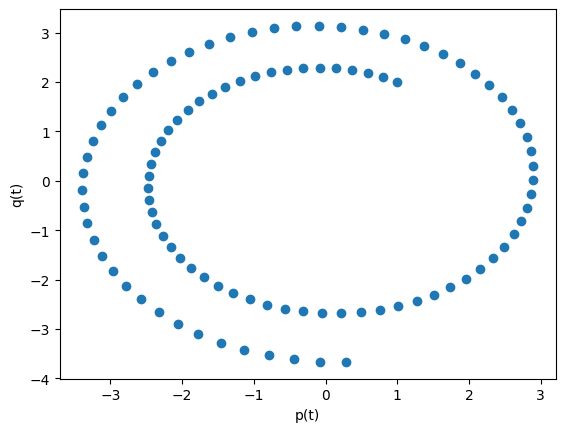

In [ ]:
# Eular法
draw(eular, 1, 2)

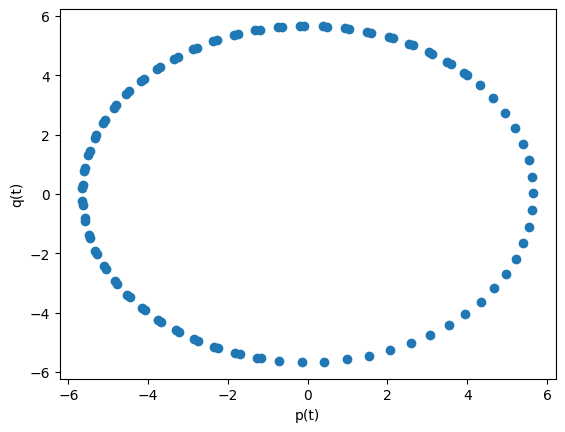

In [ ]:
# Leapfrog法
draw(leapfrog, 4, 4)

## 問題19

In [112]:
x = np.random.normal(loc=0, scale=1, size=100)
size = 10000

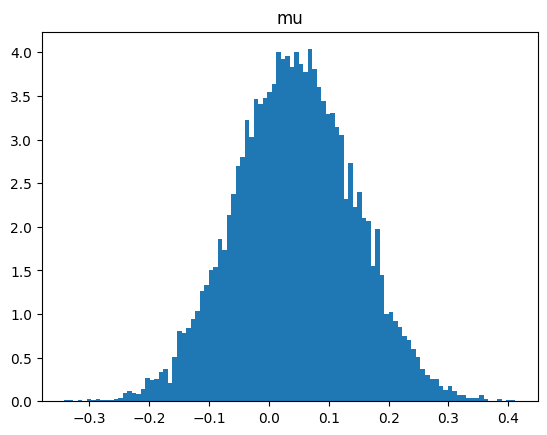

In [113]:
# 理論的な事後分布
mu = x.sum() / 101
sigma = np.sqrt(1 / 101)
data = np.random.normal(loc=mu, scale=sigma, size=size)
plt.title('mu')
_ = plt.hist(data, bins=100, density=True)

In [115]:
stan_code = """
data {
  array[100] real x;
}

parameters {
  real mu;
}

model {
  mu ~ normal(0, 1);
  x ~ normal(mu, 1);
}
"""

In [116]:
# stanによる事後分布
data = {'x': x}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=size)
fit_df = fit.to_frame()

Building...



Building: 33.8s, done.Sampling:   0%
Sampling:  25% (11000/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!


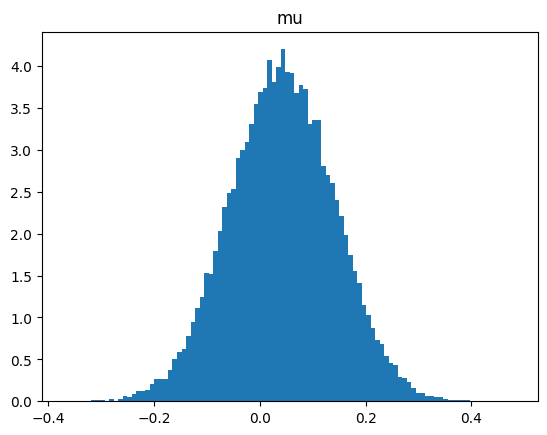

In [117]:
plt.title('mu')
_ = plt.hist(fit_df['mu'], bins=100, density=True)

## 問題22

In [118]:
# sklearn1.2からload_bostonは削除されたのでバージョンを下げる
!pip install scikit-learn==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [119]:
from sklearn.datasets import load_boston

In [120]:
boston = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [121]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数(MEDV)をデータフレームに結合
df['MEDV'] = np.array(boston.target)

In [122]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [123]:
stan_code = """
data {
  int N;
  int M;
  vector[N] y;
  matrix[N, M] x;
}

parameters {
  vector[M] beta;
  real <lower=0> sigma;
}

model {
  beta ~ normal(0, 100);
  sigma ~ cauchy(0, 5);
  y ~ normal(x * beta, sigma);
}
"""

In [124]:
# RMとLSTATからMEDVを予測
N = len(df)  # サンプルサイズ
M = 2  # 変数の数
y = df['MEDV'].to_numpy()  # 目的変数
x = df.loc[:, ['RM', 'LSTAT']].to_numpy()  # 説明変数

In [125]:
data = {'N': N, 'M': M, 'y': y, 'x': x}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=10000)
fit_df = fit.to_frame()

Building...



Building: 41.5s, done.Messages from stanc:
Warning in '/tmp/httpstan_aon09xdm/model_67vz7pg4.stan', line 15, column 19: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (11000/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling:  76% (33600/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gra

In [126]:
fit_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,beta.2,sigma
draws,,,,,,,,,,
0,-1120.019112,0.914500,0.450545,3.0,7.0,0.0,1120.285698,4.976647,-0.711862,5.322271
1,-1117.245496,0.987524,0.410160,4.0,15.0,0.0,1117.641394,4.956652,-0.677398,5.526273
2,-1118.460659,0.817154,0.429860,2.0,7.0,0.0,1120.268969,4.958182,-0.647889,5.523282
3,-1117.092876,0.957238,0.496640,2.0,7.0,0.0,1119.882068,4.886660,-0.653559,5.480065
4,-1120.117490,1.000000,0.450545,2.0,3.0,0.0,1120.961714,5.043573,-0.689314,5.335077


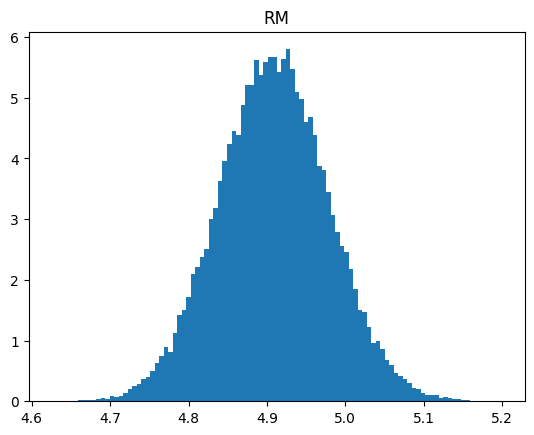

In [127]:
# RMの事後分布
plt.title('RM')
_ = plt.hist(fit_df['beta.1'], bins=100, density=True)

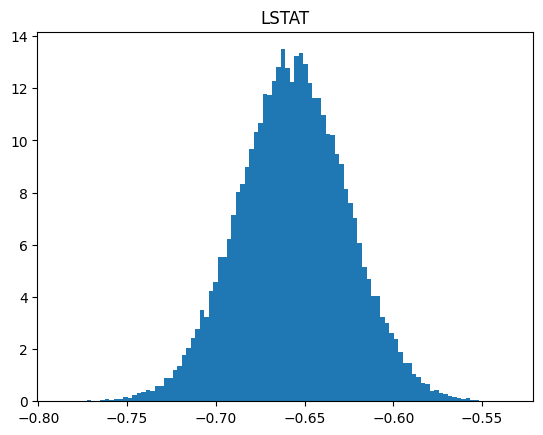

In [128]:
# LSTATの事後分布
plt.title('LSTAT')
_ = plt.hist(fit_df['beta.2'], bins=100, density=True)

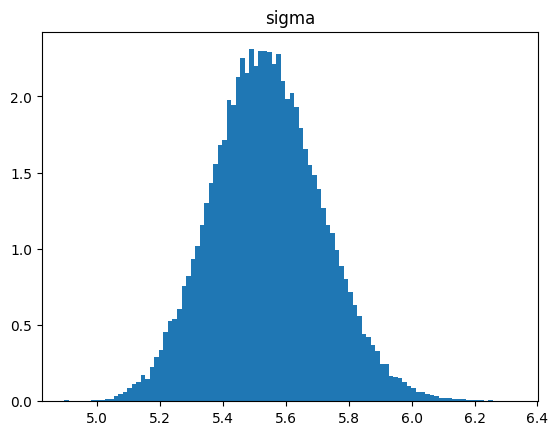

In [129]:
# sigmaの事後分布
plt.title('sigma')
_ = plt.hist(fit_df['sigma'], bins=100, density=True)

## 問題23

In [130]:
stan_code = """
data {
  int N;
  int M;
  vector[N] y;
  matrix[N, M] x;
}

parameters {
  vector[M] beta;
  real <lower=0> sigma;
}

model {
  beta ~ normal(0, 100);
  sigma ~ cauchy(0, 5);
  y ~ normal(x * beta, sigma);
}
"""

In [131]:
# RMからMEDVを予測
N = len(df)  # サンプルサイズ
M = 1  # 変数の数
y = df['MEDV'].to_numpy()  # 目的変数
x = df.loc[:, ['RM']].to_numpy()  # 説明変数

In [132]:
data = {'N': N, 'M': M, 'y': y, 'x': x}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=10000)
fit_df = fit.to_frame()

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_aon09xdm/model_67vz7pg4.stan', line 15, column 19: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (11000/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took

In [133]:
fit_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,sigma
draws,,,,,,,,,
0,-1281.541110,0.939001,0.843591,2.0,7.0,0.0,1281.991953,3.634853,7.807386
1,-1283.600241,0.850025,0.764184,3.0,7.0,0.0,1283.959665,3.612115,8.158194
2,-1282.206378,0.933056,0.833248,2.0,3.0,0.0,1282.447765,3.597604,7.873203
3,-1282.079185,0.893871,0.905449,2.0,3.0,0.0,1282.482725,3.680589,7.365815
4,-1282.084642,0.813814,0.843591,1.0,3.0,0.0,1283.790218,3.695207,7.403024


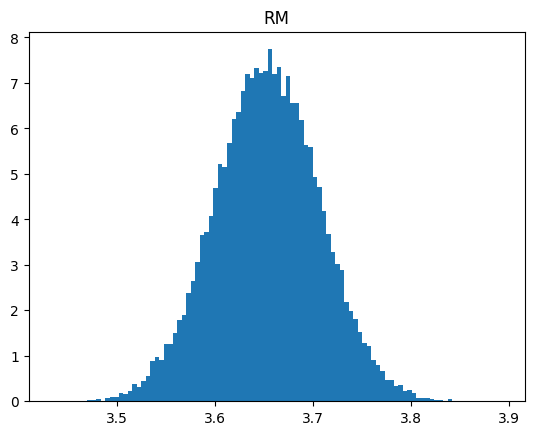

In [134]:
# RMの事後分布
plt.title('RM')
_ = plt.hist(fit_df['beta.1'], bins=100, density=True)

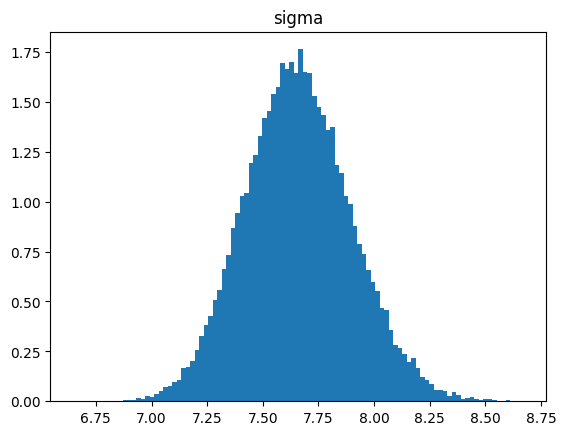

In [135]:
# sigmaの事後分布
plt.title('sigma')
_ = plt.hist(fit_df['sigma'], bins=100, density=True)

## 問題24

In [70]:
stan_code = """
data {
  int <lower=0> N;
  vector[N] y;
}

parameters {
  ordered[2] mu;
  real <lower=0, upper=1> theta;
  real <lower=0> sigma_1;
  real <lower=0> sigma_2;
}

model {
  mu ~ normal(0, 2);
  theta ~ beta(5, 5);
  for (n in 1:N)
    target += log_mix(theta,
      normal_lpdf(y[n] | mu[1], sigma_1),
      normal_lpdf(y[n] | mu[2], sigma_2));

}
"""

In [71]:
N = 100
y = np.random.normal(loc=0, scale=1, size=N)
data = {'N': N, 'y': y}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=10000)
fit_df = fit.to_frame()

Building...



Building: 45.5s, done.Messages from stanc:
Warning in '/tmp/httpstan_zaxnnigg/model_n2iwfg3i.stan', line 16, column 2: The
    parameter theta is on the left-hand side of more than one tilde
    statement.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (100/44000)
Sampling:   1% (300/44000)
Sampling:   2% (700/44000)
Sampling:   2% (900/44000)
Sampling:   2% (1100/44000)
Sampling:   3% (1400/44000)
Sampling:  27% (11700/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metrop

In [72]:
fit_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu.1,mu.2,theta,sigma_1,sigma_2
draws,,,,,,,,,,,,
0,-146.371677,1.000000,0.264699,2.0,7.0,0.0,149.008266,-0.055437,-0.007725,0.452123,0.967234,9.050363e-01
1,-145.669967,0.978774,0.167201,3.0,7.0,0.0,148.342502,-0.066317,0.383617,0.706683,0.892219,7.454436e-01
2,551.136115,0.657885,0.391837,1.0,3.0,1.0,-549.166022,-0.064745,0.245119,0.934810,0.937517,1.521492e+308
3,-143.575328,1.000000,0.209645,2.0,3.0,0.0,144.062393,-0.324653,0.419434,0.477347,0.909384,8.441645e-01
4,-145.399257,0.914972,0.264699,3.0,15.0,0.0,149.168616,0.000340,0.361198,0.593537,1.041078,9.268133e-01


## 問題25

In [136]:
stan_code = """
data {
  int N;
  array[N] real y;
  array[N] real x;
}

parameters {
  real mu_y;
  real <lower=0> sigma_y;
  real mu_x;
  real <lower=0> sigma_x;
}

model {
  mu_y ~ normal(0, 100);
  sigma_y ~ cauchy(0, 5);
  mu_x ~ normal(0, 100);
  sigma_x ~ cauchy(0, 5);
  y ~ normal(mu_y, sigma_y);
  x ~ normal(mu_x, sigma_x);
}

generated quantities {
  real diff;
  diff = mu_x - mu_y;
}
"""

In [141]:
N = 100
y = np.random.normal(loc=5, scale=2, size=N)
x = np.random.normal(loc=7, scale=6, size=N)
data = {'N': N, 'y': y, 'x': x}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=10000)
fit_df = fit.to_frame()

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_fiw96ke0/model_w5sjn7fe.stan', line 18, column 19: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_fiw96ke0/model_w5sjn7fe.stan', line 16, column 19: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (11000/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your e

In [142]:
fit_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu_y,sigma_y,mu_x,sigma_x,diff
draws,,,,,,,,,,,,
0,-331.429502,1.000000,0.737742,2.0,3.0,0.0,333.350581,4.906025,1.855456,6.054051,5.931769,1.148026
1,-330.936333,0.965860,0.829955,3.0,7.0,0.0,331.918406,4.637140,1.917603,6.220978,5.533502,1.583837
2,-334.660235,0.806656,0.760911,2.0,7.0,0.0,335.340343,4.582696,1.772638,7.101757,6.497227,2.519060
3,-337.177729,0.681421,0.715829,3.0,7.0,0.0,340.845317,4.223949,1.923475,5.992550,6.386133,1.768601
4,-331.130321,0.990931,0.737742,3.0,7.0,0.0,332.048438,4.691434,1.962750,6.627445,5.677293,1.936011


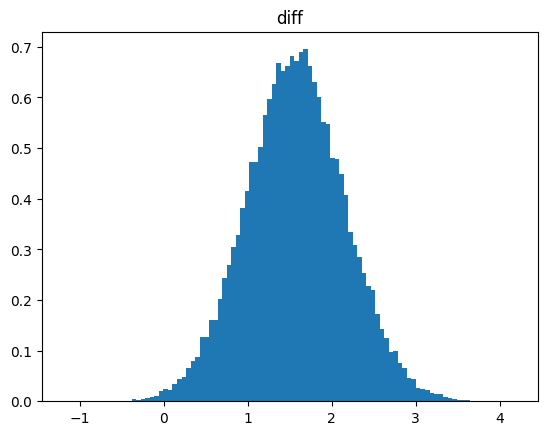

In [143]:
plt.title('diff')
_ = plt.hist(fit_df['diff'], bins=100, density=True)

In [144]:
# mu_x > my_yの確率
(fit_df['diff'] > 0).sum() / len(fit_df) * 100

99.64

## 問題26

In [145]:
stan_code = """
data {
  int N;
  int M;
  array[N] int y;
  matrix[N, M] x;
}

parameters {
  vector[M] beta;
}

model {
  beta ~ normal(0, 100);
  y ~ bernoulli_logit(x*beta);
}
"""

In [153]:
N = 100
M = 3
# 切片を除く説明変数
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean=mean, cov=cov, size=N)
# 切片用の1のベクトル
ones = np.ones(N).reshape(-1, 1)
# 説明変数
x = np.concatenate((ones, x), axis=1)
beta = np.random.normal(loc=0, scale=100, size=M)
logit_params = (x * beta).sum(axis=1)
prob = 1 / (1 + np.exp(-1 * logit_params))
# 目的変数
y = np.random.binomial(n=1, p=prob, size=N)

In [154]:
data = {'N': N, 'M': M, 'y': y, 'x': x}
sm = stan.build(stan_code, data=data)
fit = sm.sample(num_samples=10000)
fit_df = fit.to_frame()

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_indzyzxs/model_k5pxls3r.stan', line 14, column 19: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   2% (700/44000)
Sampling:  27% (11700/44000)
Sampling:  52% (22700/44000)
Sampling:  77% (33700/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!

In [155]:
fit_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,beta.2,beta.3
draws,,,,,,,,,,
0,-1.767098,0.872792,0.039431,6.0,79.0,0.0,2.393674,93.512949,-100.485804,-102.740856
1,-2.468109,0.542841,0.031564,3.0,7.0,0.0,8.179695,121.351348,-132.056953,-122.330163
2,-1.719902,1.000000,0.027596,1.0,1.0,0.0,3.513758,91.140015,-94.570468,-90.189567
3,-1.704432,0.905176,0.025408,2.0,7.0,0.0,3.612987,100.891990,-107.072914,-106.467237
4,-1.918015,0.831114,0.039431,3.0,15.0,0.0,3.510164,97.588134,-102.888383,-104.188045


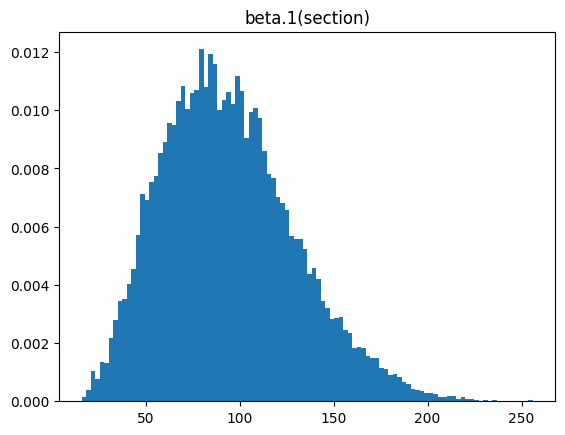

In [156]:
plt.title('beta.1(section)')
_ = plt.hist(fit_df['beta.1'], bins=100, density=True)

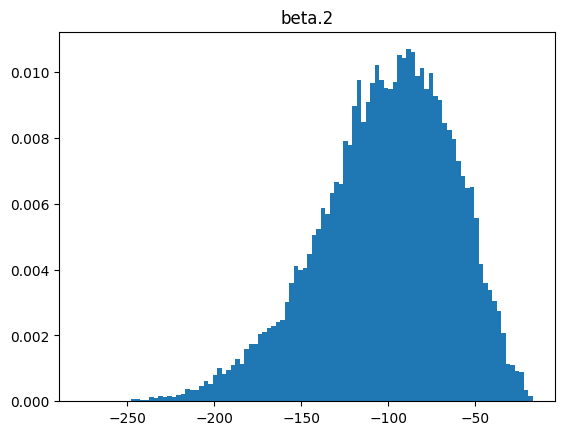

In [157]:
plt.title('beta.2')
_ = plt.hist(fit_df['beta.2'], bins=100, density=True)

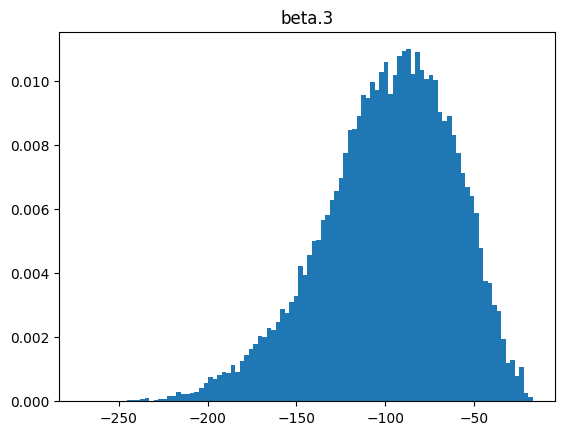

In [158]:
plt.title('beta.3')
_ = plt.hist(fit_df['beta.3'], bins=100, density=True)